<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/intro_classification_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab を利用して，分類問題のためのコードを書く

## penguins dataset
- データ数: 344
- 特徴の種類: 7種類

|変数名|説明|
|---|---|
|island | ペンギンが生息する島の名前('Torgersen', 'Biscoe', 'Dream')|
|bill_length_mm | ペンギンのくちばしの長さ(mm)|
|bill_depth_mm | ペンギンのくちばしの奥行き(mm)|
|flipper_length_mm |	ペンギンのヒレの長さ(mm)|
|body_mass_g	| ペンギンの体重(g)|
|sex	| ペンギンの性別('Male', 'Female')|
|species	| ペンギンの種類('Adelie', 'Chinstrap', 'Gentoo')|



以下に，一通りの処理を一括で記述したコードを示す。

Accuracy: 0.9850746268656716


<Axes: >

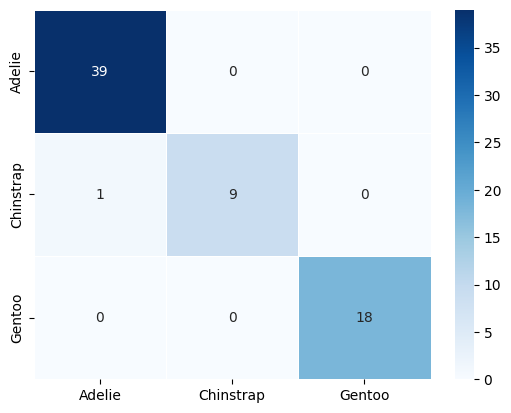

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns


# データセットを読み込み (Penguins dataset)
df = sns.load_dataset("penguins")

# 欠損値の削除
df = df.dropna()

# カテゴリカル変数 (island, sex) の one-hot encoding
df = pd.get_dummies(df, columns=['island', 'sex'])

# 特徴とラベルへの分離
X = df.drop('species', axis=1)
y = df['species']

# 学習データとテストデータを8:2で分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# モデルの定義
model = DecisionTreeClassifier()

# モデルの学習
model.fit(X_train, y_train)

# テストデータに対する予測値の計算
y_pred = model.predict(X_test)

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# モデルの性能の可視化
labels = df['species'].unique()
sns.heatmap(
    pd.DataFrame(
        confusion_matrix(y_test, y_pred),
        columns=labels,
        index=labels,
    ),
    annot=True, cmap="Blues", fmt="d", linewidths=0.7
    )

<font color="red">(注意) 上記のコードを実行したのち，下記のコードを改めて実行する場合，このタイミングでランタイムを再起動してください。</font>

---
## step-by-step による解説
上記は，コード全体をひとつのセルに押し込んだが，**Google Colabratory ではステップ・バイ・ステップで実行することが可能**である。
試行錯誤しながらコードを書く場合，step by step で取り組むことをお勧めする。

### ライブラリのインポート
処理に必要となるライブラリをインポートする。
ここで用いるのは pandas, sciki-learn および seaborn である。

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

### データの読み込み & 概要のチェック

In [ ]:
# データセットを読み込み (Penguins dataset)
df = sns.load_dataset("penguins")

データの冒頭を眺めてみる。
DataFrame に対して head() メソッドを発行する。

In [ ]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


データ構造を確認する。これには，Pandas DataFrame の info() メソッドを用いる。
- species (品種) は object 型であり，クラスラベルとなる。
-bill_length_mm, bill_depth_mm などは実数 (float64)
- island, sex はカテゴリカル変数 （object型)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### データに対する前処理
以下では，欠損値の削除およびカテゴリカル変数の one-hot encoding を行う。

欠損値の有無を確認する。
いくつかの項目に欠損値が含まれる。

In [ ]:
# 欠損値の有無を確認
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

欠損値の削除を行う。

In [ ]:
# 欠損値の削除
df = df.dropna()

カテゴリカル変数を pne-hot encoding し，数値化する。（厳密には真偽値だが，0 または 1 が割り当てられると考えてよい）

In [ ]:
# カテゴリカル変数 (island, sex) の one-hot encoding
df = pd.get_dummies(df, columns=['island', 'sex'])
df.head() # データの中身を確認

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,Adelie,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,Adelie,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,Adelie,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,Adelie,39.3,20.6,190.0,3650.0,False,False,True,False,True


### 分類実験へ向けての準備

In [ ]:
# 特徴とラベルへの分離
X = df.drop('species', axis=1)
y = df['species']

# 学習データとテストデータを8:2で分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

学習データ，テストデータのサンプル数，次元数を確認する。
- 学習データは 266個，テストデータは 67個
- 特徴の次元数は 9次元

In [ ]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (266, 9)
X_test:  (67, 9)
y_train:  (266,)
y_test:  (67,)


### モデルの定義と学習，評価

In [ ]:
# モデルの定義
model = DecisionTreeClassifier()

# モデルの学習
model.fit(X_train, y_train)

# テストデータに対する予測値の計算
y_pred = model.predict(X_test)

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9850746268656716


### モデルの性能の可視化
以下では，ヒートマップを用いた可視化を行う。

<Axes: >

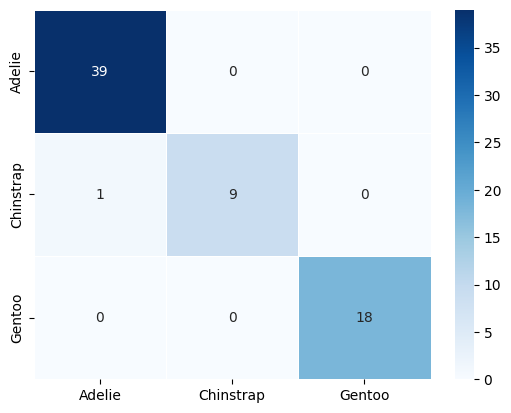

In [ ]:
# モデルの性能の可視化
labels = df['species'].unique()
sns.heatmap(
    pd.DataFrame(
        confusion_matrix(y_test, y_pred),
        columns=labels,
        index=labels,
    ),
    annot=True, cmap="Blues", fmt="d", linewidths=0.7
    )